In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.lines as lines

Importamos dos datasets de Pacientes con Alzheimer. En el primero que llamaré "brain" están los volumenes de material cerebral de los paceintes. 

Mientras que en el segundo hay información de la edad y el diagnóstico. 

In [2]:
brain = pd.read_csv('datasets/TADPOLE_BASELINE.csv')
diagn = pd.read_csv('datasets/TADPOLE_BASELINE_demo.csv')

In [3]:
brain.head()

,Subject,RightAccumbensArea,RightAmygdala,RightBankssts,RightCaudalAnteriorCingulate,RightCaudalMiddleFrontal,RightCaudate,RightChoroidPlexus,RightCuneus,RightEntorhinal,...,LeftPutamen,LeftRostralAnteriorCingulate,LeftRostralMiddleFrontal,LeftSuperiorFrontal,LeftSuperiorParietal,LeftSuperiorTemporal,LeftSupramarginal,LeftTemporalPole,LeftThalamus,LeftTransverseTemporal
0,011_S_0002_bl,0.023430,0.090696,0.188647,0.121633,0.330838,0.237572,0.176252,0.164814,0.097548,...,0.246491,0.141233,0.908921,1.188264,0.692965,0.548557,0.500035,0.082382,0.362128,0.044794
1,011_S_0003_bl,0.030458,0.057792,0.150311,0.119176,0.251628,0.267300,0.196492,0.172438,0.051284,...,0.276880,0.104077,0.812312,1.102000,0.582135,0.545533,0.520021,0.094393,0.360131,0.052221
2,011_S_0005_bl,0.036873,0.070638,0.152185,0.110924,0.342888,0.207525,0.137375,0.163216,0.153891,...,0.291205,0.179245,0.741115,1.186577,0.670051,0.545719,0.573999,0.080023,0.386952,0.062044
3,022_S_0007_bl,0.034650,0.086146,0.156185,0.138011,0.395931,0.264496,0.193200,0.225634,0.078167,...,0.307421,0.122274,1.050446,1.387567,0.659613,0.537118,0.526184,0.088510,0.472324,0.074029
4,011_S_0008_bl,0.025142,0.069767,0.122773,0.137959,0.253999,0.182656,0.172341,0.174060,0.131440,...,0.284799,0.126999,0.721669,1.324146,0.738573,0.681843,0.612505,0.118834,0.373190,0.056874


In [4]:
brain.shape

(855, 85)

In [5]:
diagn.head()

,Subject,AGE,DX
0,011_S_0002_bl,74.3,0.0
1,011_S_0003_bl,81.3,1.0
2,011_S_0005_bl,73.7,0.0
3,022_S_0007_bl,75.4,1.0
4,011_S_0008_bl,84.5,0.0


In [6]:
print(brain.describe())

       RightAccumbensArea  RightAmygdala  RightBankssts  \
count          855.000000     855.000000     855.000000   
mean             0.030751       0.087171       0.137156   
std              0.006426       0.017383       0.025706   
min              0.013111       0.020888       0.067095   
25%              0.026596       0.075880       0.119773   
50%              0.030530       0.087478       0.135404   
75%              0.034649       0.098172       0.154237   
max              0.053832       0.161029       0.235965   

       RightCaudalAnteriorCingulate  RightCaudalMiddleFrontal  RightCaudate  \
count                    855.000000                855.000000    855.000000   
mean                       0.130581                  0.337386      0.233307   
std                        0.027181                  0.065221      0.036281   
min                        0.058917                  0.144483      0.137516   
25%                        0.112101                  0.295938      0.2084


Vemos como hay 855 registros en nuestra base de datos, lo que supone que tenemos una muestra de 855 sujetos. 

In [7]:
print(diagn.describe())

              AGE          DX
count  855.000000  855.000000
mean    74.474386    0.391813
std      6.648541    0.488441
min     55.100000    0.000000
25%     70.500000    0.000000
50%     74.300000    0.000000
75%     78.900000    1.000000
max     90.900000    1.000000


In [54]:
brain.isna().sum().sum()

0

In [56]:
diagn.isna().sum()

Subject    0
AGE        0
DX         0
dtype: int64

Tenemos que el sujeto más joven tiene 55.10 años y el más mayor 90.90 años. Vemos también que el 39% de nuestra muestra no tiene un diagnóstico de Alzheimer y que el 61% sí lo tienen. 

También podemos ver como los datos no están normalizados. Por lo tanto, cada atributo está en un rango diferente. Por lo tanto, antes de seguir con los análisis tenemos que normalizar los atributos de manera que todos estén en la misma escala.

Esto es importante porque los algoritmos que emplearé más adelante son más sensibles a valores altos. Por lo tanto, si un atributo tiene unos valores más grandes, el algoritmo estará sesgado hacia estos atributos.

## Normalización de los datos

In [8]:
# convertimos el dataframe en una matriz numérica
brain_num = brain.drop(columns = 'Subject')

In [9]:
# para normalizar los datos, podemos crear una nueva función

def norm_df(df: pd.DataFrame()):
    brain_norm = (df - df.mean())/df.std()
    return brain_norm

In [10]:
# normalizamos los datos con la función anterior y generamos una matriz de correlaciones

brain_norm = norm_df(brain_num)

brain_corr = brain_norm.corr()
brain_corr

,RightAccumbensArea,RightAmygdala,RightBankssts,RightCaudalAnteriorCingulate,RightCaudalMiddleFrontal,RightCaudate,RightChoroidPlexus,RightCuneus,RightEntorhinal,RightFrontalPole,...,LeftPutamen,LeftRostralAnteriorCingulate,LeftRostralMiddleFrontal,LeftSuperiorFrontal,LeftSuperiorParietal,LeftSuperiorTemporal,LeftSupramarginal,LeftTemporalPole,LeftThalamus,LeftTransverseTemporal
RightAccumbensArea,1.000000,0.517312,0.312466,0.171977,0.268088,0.252343,-0.331535,0.290401,0.401324,0.262888,...,0.481780,0.301113,0.383271,0.448664,0.350115,0.460821,0.406326,0.390991,0.228823,0.245712
RightAmygdala,0.517312,1.000000,0.396695,0.139362,0.276615,0.147367,-0.247481,0.323866,0.553151,0.313654,...,0.379720,0.301514,0.444215,0.463931,0.365504,0.527257,0.455076,0.479981,0.282623,0.333744
RightBankssts,0.312466,0.396695,1.000000,0.093094,0.280871,0.130750,-0.156865,0.206382,0.295362,0.265210,...,0.245778,0.296644,0.388486,0.361624,0.280521,0.481548,0.389358,0.266547,0.106353,0.236920
RightCaudalAnteriorCingulate,0.171977,0.139362,0.093094,1.000000,0.145231,0.052771,-0.107197,0.177053,0.113419,0.162060,...,0.089423,0.202880,0.246909,0.200939,0.149096,0.166728,0.123950,0.195060,0.029744,0.139950
RightCaudalMiddleFrontal,0.268088,0.276615,0.280871,0.145231,1.000000,0.119865,-0.143873,0.240554,0.197547,0.184955,...,0.196727,0.305890,0.398227,0.459057,0.314966,0.309697,0.354726,0.195053,0.097257,0.243032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LeftSuperiorTemporal,0.460821,0.527257,0.481548,0.166728,0.309697,0.158834,-0.300030,0.380141,0.374826,0.407297,...,0.413281,0.421814,0.570557,0.595896,0.446876,1.000000,0.607156,0.525077,0.204238,0.501530
LeftSupramarginal,0.406326,0.455076,0.389358,0.123950,0.354726,0.183157,-0.195929,0.363908,0.333414,0.358930,...,0.346821,0.396962,0.554863,0.575132,0.531343,0.607156,1.000000,0.427774,0.129184,0.431185
LeftTemporalPole,0.390991,0.479981,0.266547,0.195060,0.195053,0.237387,-0.197143,0.304839,0.389121,0.470964,...,0.395591,0.388123,0.450460,0.446456,0.389846,0.525077,0.427774,1.000000,0.181368,0.333522
LeftThalamus,0.228823,0.282623,0.106353,0.029744,0.097257,0.062728,-0.162168,0.094065,0.193592,0.142487,...,0.249923,0.005015,0.123402,0.195046,0.118507,0.204238,0.129184,0.181368,1.000000,0.192563


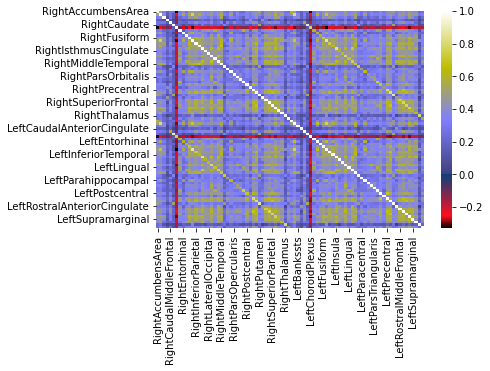

In [11]:
sns.heatmap(brain_corr, cmap="gist_stern")
plt.show()

En este plot se puede apreciar como hay una diagonal principal y luego dos diagnoales secundarias. Y como de manera general todas las áreas cerebrales tienen una correlación positiva entre ellas. A excepción de las áreas de Choroid Plexus que tienen correlaciones negativas con las demás áreas. 

Las áreas cerebrales también tienen una correlación muy alta con su misma área en el otro hemisferio. Como se puede apreciar mirando las dos diagonales secundarias.

Al tener valores de correlación muy altas las variables. Significa que hay mucha redundancia en los datos y que podemos utilizar una PCA para reducir dicho problema.

Si buscamos información sobre esta área vemos como no es un área cerebral propiamente, sino que es una capa de células que recubren los ventrículos.
https://es.wikipedia.org/wiki/Plexos_coroideos

En este caso, lo mejor será eliminar estos dos atributos de los datos.


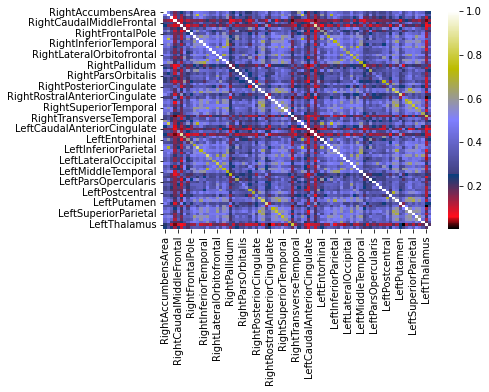

In [12]:
brain_num_cl = brain_num.drop(
    columns = ['LeftChoroidPlexus', 'RightChoroidPlexus'])

brain_norm = norm_df(brain_num_cl)

brain_corr = brain_norm.corr()

sns.heatmap(brain_corr, cmap="gist_stern")
plt.show()

Con este pequeño cambio han desaparecido las correlaciones negativas del dataset.

## Obtener los Componentes principales.

Mediante la técnica de Singular Value Decomposition (SVD) se puede descomponer una matrix en tres matrices distintas, donde cada vector de la matrix Vt corresponde a un componente principal. De manera que el primer vector es el primer componente y el n vector corresponde al n componente principal.

Está técnica es especialmente útil para reducir el número de dimensiones, pero manteniendo la máxima cantidad de varianza.

In [13]:
U, s, Vt = np.linalg.svd(brain_corr) # svd

pc1 = Vt.T[:, 0] # primer componente de la PCA
pc1[:10]

array([-0.10860999, -0.1220315 , -0.09395271, -0.04856471, -0.08424223,
       -0.05156033, -0.10435583, -0.09023743, -0.10060189, -0.13223497])

También podemos obtener estos componentes mediante los eigenvalues:

In [14]:
eigen_values, eigen_vectors = np.linalg.eig(brain_corr)

In [15]:
s[1]

3.9648638897094286

In [16]:
s.T

array([31.16228492,  3.96486389,  3.15671231,  2.50956815,  2.21700339,
        1.97247424,  1.48789801,  1.42173626,  1.32327953,  1.21961729,
        1.17969576,  1.12318776,  1.08852918,  1.00184782,  0.98968579,
        0.94285132,  0.92122792,  0.84858801,  0.84774007,  0.78703219,
        0.7707635 ,  0.74705594,  0.72322914,  0.68479101,  0.67216089,
        0.65158382,  0.61126185,  0.59056954,  0.58087575,  0.56008723,
        0.54902597,  0.53891809,  0.52488723,  0.51035639,  0.49533092,
        0.48091478,  0.47654693,  0.46757831,  0.45857355,  0.43759048,
        0.41574647,  0.41389261,  0.40100409,  0.39628581,  0.39187331,
        0.38032909,  0.37130948,  0.35757079,  0.35123476,  0.34503829,
        0.33572797,  0.32424417,  0.32229723,  0.30917896,  0.29514879,
        0.29439091,  0.28669491,  0.27611453,  0.26511541,  0.25109407,
        0.24596836,  0.23571275,  0.23228808,  0.22619398,  0.22221777,
        0.20885841,  0.20142974,  0.19375301,  0.18531679,  0.17

In [17]:
len(s)

82

Una vez tenemos los componentes, podemos calcular la variabilidad que cada uno de ellos retiene.

Esto es útil para seleccionar el número de componentes que dejaremos para entrenar el modelo final. 

In [18]:
var_pc = []
val_pc = []

for i in range(0, len(s)):
    var_pci = sum(s[1:i]) / sum(s)
    pci_val = s[i] / sum(s)
    var_pc.append(var_pci)
    val_pc.append(pci_val)
    
print('Varianza explicada por las Primeras 5 Componentes:\n\n',
      val_pc[:5], '\n')

print('Varianza acumulada por las Primeras 5 Componentes:\n\n',
      var_pc[:5])


Varianza explicada por las Primeras 5 Componentes:

 [0.3800278649172467, 0.04835199865499302, 0.03849649162892398, 0.030604489576764326, 0.027036626686751206] 

Varianza acumulada por las Primeras 5 Componentes:

 [0.0, 0.0, 0.04835199865499302, 0.086848490283917, 0.11745297986068133]


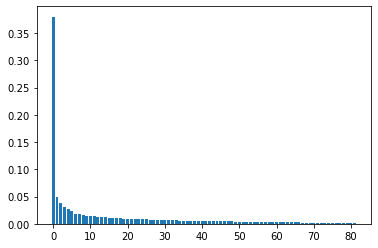

In [19]:
plt.plot()

plt.bar(np.linspace(0, 81, 82), val_pc)

plt.show()

Se puede ver muy claramente como hay una gran diferencia entre la variablidad explicada por la primera componente y las demás. Esto demuestra que efectivamente hay mucha redundancia en los datos y que el uso de componentes principales para reducir la dimensionalidad puede ser de buena ayuda en este problema.

La primera componente explica un 37.5% de toda la varianza. De manera que de 84 variables hemos visto como con un único componente se puede explicar gran parte de toda la varianza y que existe mucha redundacia en los atributos del dataset.

### Seleccionar el Número de Componentes Principales 

Un método para seleccionar el número de Componentes Principales es el método de Káiser. Para esto se seleccionan los componentes que tienen un eigenvalue > 1. Este valor indica que el Componente Principal i representa más varianza que una de las variables originales. Este método sólo se puede llevar a cabo cuando los datos están estandarizados. 

In [20]:
eigen_values[:20]

array([31.16228492,  3.96486389,  3.15671231,  2.50956815,  2.21700339,
        1.97247424,  1.48789801,  1.42173626,  1.32327953,  1.21961729,
        1.17969576,  1.12318776,  1.08852918,  1.00184782,  0.98968579,
        0.94285132,  0.92122792,  0.84858801,  0.84774007,  0.78703219])

In [21]:
eigen_values[:14]

array([31.16228492,  3.96486389,  3.15671231,  2.50956815,  2.21700339,
        1.97247424,  1.48789801,  1.42173626,  1.32327953,  1.21961729,
        1.17969576,  1.12318776,  1.08852918,  1.00184782])

De manera que tenemos que los primeros 14 componentes principales tienen un valor > 1 y los podríamos seleccionar.

In [22]:
# 14 componentes principales

pc1_14 = Vt.T[:, 0:14]
pc1_14

array([[-0.10860999, -0.14083356,  0.0661639 , ..., -0.1004619 ,
         0.01551136, -0.16012917],
       [-0.1220315 , -0.21444651, -0.05314359, ...,  0.10894422,
        -0.00732804, -0.09598564],
       [-0.09395271, -0.07416537, -0.10856571, ..., -0.1355926 ,
         0.1936818 ,  0.21665025],
       ...,
       [-0.11713258, -0.06680295,  0.03205836, ...,  0.04521488,
        -0.03613516,  0.01582951],
       [-0.04644907, -0.17455873,  0.13870428, ...,  0.25628063,
         0.07818219,  0.11434986],
       [-0.09732977,  0.05969731, -0.00557853, ..., -0.01816801,
         0.15551541, -0.06018609]])

Una vez hemos selecionados el número de componentes principales, podemos transformar los datos para reducir el número de dimensiones del dataset original. Para hacerlo, múltiplicamos la matriz de los datos originales junto con la matriz de los primero 14 componentes.

Para eso, es necesario que el número de columnas de la matrix de los datos originales (brain_num) sea igual al número de filas de la matrix de los componentes principales. 

Con la función shape, podemos ver si se cumple esta condición y obtener la matrix que resulta de la multiplicación.

In [23]:
pc1_14.shape

(82, 14)

In [24]:
brain_num_cl.shape

(855, 82)

In [26]:
brain_red = brain_num_cl.dot(pc1_14)
brain_red.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.120920,0.311297,-0.207844,-0.238248,1.059452,0.366266,-0.219164,0.080433,0.353756,-0.399241,0.441496,0.126314,0.211477,-0.145734
1,-2.764124,0.348425,0.017874,-0.314291,0.823108,0.335469,-0.271126,0.060692,0.278500,-0.370917,0.301974,0.058318,0.217246,-0.097525
2,-3.367002,0.264224,-0.329327,-0.369807,1.067295,0.205981,-0.361808,0.100209,0.376015,-0.490057,0.400539,-0.022170,0.008073,-0.016738
3,-3.460745,0.459035,-0.070624,-0.312577,1.066562,0.561834,-0.244161,0.026911,0.374442,-0.440668,0.511718,0.028147,0.177729,-0.125162
4,-3.397274,0.315061,-0.334642,-0.316144,1.073429,0.395777,-0.276566,0.052574,0.290454,-0.395371,0.497571,0.101695,0.105560,-0.076438


In [27]:
brain_red['Subject'] = brain['Subject']

In [28]:
brain_red.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Subject
0,-3.120920,0.311297,-0.207844,-0.238248,1.059452,0.366266,-0.219164,0.080433,0.353756,-0.399241,0.441496,0.126314,0.211477,-0.145734,011_S_0002_bl
1,-2.764124,0.348425,0.017874,-0.314291,0.823108,0.335469,-0.271126,0.060692,0.278500,-0.370917,0.301974,0.058318,0.217246,-0.097525,011_S_0003_bl
2,-3.367002,0.264224,-0.329327,-0.369807,1.067295,0.205981,-0.361808,0.100209,0.376015,-0.490057,0.400539,-0.022170,0.008073,-0.016738,011_S_0005_bl
3,-3.460745,0.459035,-0.070624,-0.312577,1.066562,0.561834,-0.244161,0.026911,0.374442,-0.440668,0.511718,0.028147,0.177729,-0.125162,022_S_0007_bl
4,-3.397274,0.315061,-0.334642,-0.316144,1.073429,0.395777,-0.276566,0.052574,0.290454,-0.395371,0.497571,0.101695,0.105560,-0.076438,011_S_0008_bl


Por último, juntamos los dos datasets y podemos emplearlos para elaborar un modelo.

In [33]:
diagn.head()

,Subject,AGE,DX
0,011_S_0002_bl,74.3,0.0
1,011_S_0003_bl,81.3,1.0
2,011_S_0005_bl,73.7,0.0
3,022_S_0007_bl,75.4,1.0
4,011_S_0008_bl,84.5,0.0


In [35]:
result = pd.concat([brain_red, diagn], axis=1, join="inner")
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Subject,Subject,AGE,DX
0,-3.120920,0.311297,-0.207844,-0.238248,1.059452,0.366266,-0.219164,0.080433,0.353756,-0.399241,0.441496,0.126314,0.211477,-0.145734,011_S_0002_bl,011_S_0002_bl,74.3,0.0
1,-2.764124,0.348425,0.017874,-0.314291,0.823108,0.335469,-0.271126,0.060692,0.278500,-0.370917,0.301974,0.058318,0.217246,-0.097525,011_S_0003_bl,011_S_0003_bl,81.3,1.0
2,-3.367002,0.264224,-0.329327,-0.369807,1.067295,0.205981,-0.361808,0.100209,0.376015,-0.490057,0.400539,-0.022170,0.008073,-0.016738,011_S_0005_bl,011_S_0005_bl,73.7,0.0
3,-3.460745,0.459035,-0.070624,-0.312577,1.066562,0.561834,-0.244161,0.026911,0.374442,-0.440668,0.511718,0.028147,0.177729,-0.125162,022_S_0007_bl,022_S_0007_bl,75.4,1.0
4,-3.397274,0.315061,-0.334642,-0.316144,1.073429,0.395777,-0.276566,0.052574,0.290454,-0.395371,0.497571,0.101695,0.105560,-0.076438,011_S_0008_bl,011_S_0008_bl,84.5,0.0


## Entrenar el modelo de Machine Learning

#### Suport Vector Machines (SVM)

Para poder generar un modelo que sea útil a la hora de predecir si un próximo paciente debería ser diagnosticado con Alzheimer, podemos utilizar modelos como el de Support Vector Machines que es un modelo potente para hacer clasificaciones.

Antes de entrenar el modelo, tenemos que dividir los datos en dos datasets. Uno será el que voy a utilizar para entrenar el algoritmo y el otro lo utilizaré para testear la capacidad predicitva que tiene.

Otra manera alternativa es utilizar el método de cross validation k-folds. Que divide en k datasets llamados folds los datos originales y entrena y evalúa el modelo k veces. 

Para más información: https://scikit-learn.org/stable/modules/cross_validation.html

In [38]:
# separamos la variable diagnóstico del resto del datset

y = result['DX']
X = result.drop(columns = ['DX', 'Subject'])

In [40]:
# versión sencilla de svm utilizando un kernel lineal y cross validation
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.89473684, 0.8245614 , 0.87719298, 0.89473684, 0.85380117])

In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.03


#### Grid Search
Manera de obtener el kernel idóneo, el valor de gamma y el valor de c para estimar el mejor valor modelo de PCA.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# parametros que vamos a probar para estimar el mejor modelo.
param_grid = {'C':[0.001,0.01,0.1,0.5,1,2,10,100],
             'kernel':['linear','rbf'],
              'gamma':['scale','auto']}

svm = SVC()
grid = GridSearchCV(svm,param_grid)

grid.fit(X_train,y_train)

grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [57]:
# Con los mejores parámetros, creamos un nuevo modelo y vemos que tiene una precisión de 0.89 de media
# utilizando cross_validation

clf = SVC(kernel='linear', C=100, gamma = 'scale', random_state=42)
scores = cross_val_score(clf, X_train,y_train, cv=5)
scores

array([0.89565217, 0.86956522, 0.92105263, 0.86842105, 0.89473684])

In [58]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.02


Vemos que este modelo tiene una precisión alta. Este valor nos da información, pero no toda la que queremos. 

Al tratarse de un problema de clasificación, queremos saber cuantos casos de Alzheimer son clasificados correctamente como casos de Alzheimer (Sensibilidad) y cuantos casos de personas sin Alzheimer son correctamente clasificadas como que no tienen Alzheimer (Especificidad).

A partir de esta matriz podemos obtener métricas que nos van a dar información de cómo el modelo está clasificando los casos positivos y negativos en la enfermedad. Un modelo podría tener una sensibilidad muy alta a costa de perder mucha especificidad. 

Precisión de los casos positivos:

$$
  Precision = \frac{VP}{VP + FP}\
$$

Sensibilidad. El ratio de casos positivos que el modelo detecta como positivos respecto al total de positivos. 

$$
  Sensibilidad = \frac{VP}{VP + FN}\
$$

Especificidad. El ratio de casos negativos que el modelo detecta como negativos respecto al total de negativos. 

$$
  Especificidad = \frac{VN}{VN + FP}\
$$


Para generar estos valores, primero tenemos que generar la matriz de confusión:

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# cross_val_predict() en vez de retornar los scores, devuelve las predicciones de cada test fold
y_train_pred = cross_val_predict(clf, X_train,y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[319,  26],
       [ 37, 190]], dtype=int64)

In [61]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

In [64]:
prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.8796296296296297, la sensibilidad de 0.8370044052863436 y la especifícidad de 0.9246376811594202


Ahora tenemos una imágen mejor del funcionamiento del modelo. Vemos que el valor más bajo es el de sensibilidad. Lo que significa que el 83,7% de las personas que tengan Alzheimer serán correctamente diagnósticadas con este modelo. Pero hay un 16,3% de personas con Alzhiemer que no reciben el diagnóstico. En consecuencia, estas personas podrían no recibir un tratamiento cuando en realidad deberían. En este caso, es mucho mejor recibir falsas alertas y clasificar incorrectamente a personas que no tienen la enfermedad como si la tuvieran.

Una manera de solucionar esto es aumentar la sensibilidad a cambio de reducir la precisión del modelo y la especificidad.

Primero voy a mirar cuanta precisión se pierde si se aumenta la sensibilidad. El modelo ideal tendría que tener un 95% o 99% de sensibilidad sin perder mucha precisión. 

Para mirar esto, lo mejor es utilizar la curva de precisión vs. sensibilidad.

In [66]:
# seleccionar el threshold adecuado

y_scores = cross_val_predict(clf, X_train,y_train, cv=5,
                            method = 'decision_function')

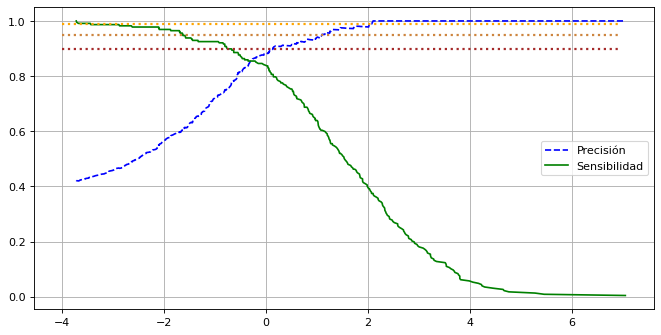

In [151]:
from sklearn.metrics import precision_recall_curve

precisions, sens, thresh = precision_recall_curve(y_train, y_scores)

def plot_prec_sens_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precisión")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Sensibilidad")
    plt.plot([-4, 6.9], [.99, .99], c = 'orange', ls = ':', lw=2)
    plt.plot([-4, 6.9], [.95, .95], c = 'peru', ls = ':', lw=2)
    plt.plot([-4, 6.9], [.9, .9], c = 'brown', ls = ':', lw=2)
    plt.legend(loc = 'center right')
    plt.grid(True)


plot_prec_sens_thresh(precisions, sens, thresh)
plt.show()

Mirando el gráfico, parece que aumentar la sensibilidad al 95% o 99% conllevaría una pérdida muy grande de precisión. Mientras que alrededor del 90% la pérdida no parece tan grande. 

Otra manera para escoger estos valores es con la ROC Curve.

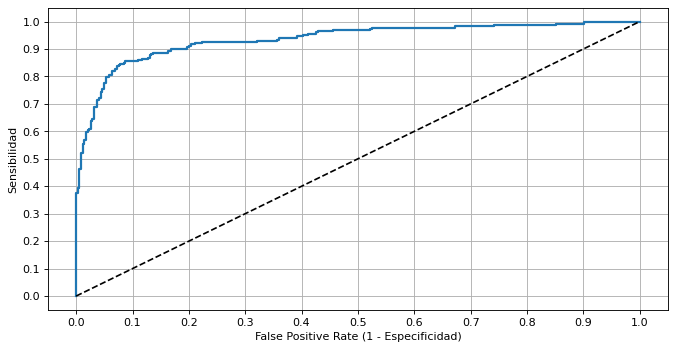

In [127]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresh = roc_curve(y_train, y_scores)

def plot_roc(fpr, tpr):
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid(True)
    plt.xticks(np.linspace(0, 1, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.ylabel('Sensibilidad')
    plt.xlabel('False Positive Rate (1 - Especificidad)')


plot_roc(fpr, tpr)
plt.show()

En la ROC Curve se puede ver como con una sensibilidad del 90%, la especificidad se mantiene alta con un 80% aproximadamente. Para aumentar más la sensibilidad, el precio a pagar es muy alto y para subir un poco la sensibilidad es necesario renunciar a mucha especificidad. Es por eso que ajustaremos el modelo para aumentar la sensibilidad a un 90%.

In [173]:
precisions, sens, thresh = precision_recall_curve(y_train, y_scores)

threshold_90_sens = thresh[np.argmax(sens <= 0.91)]

y_train_pred_90 = (y_scores >= threshold_90_sens)

In [174]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred_90).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.7490909090909091, la sensibilidad de 0.9074889867841409 y la especifícidad de 0.8


Con estos cambios hemos conseguido mejorar la sensibilidad del modelo por encima del 90%, pero la especificidad y la precisión han bajado. Para aumentar 7% la sensibilidad, ha descendido un 13% la precisión. Y se nota en la especificidad. De manera que con este modelo se detectarán más casos de Alzheimer, pero se sobrediagnosticarán a más pacientes.

### Modelo final

In [199]:
# entrenamos los datos con todos los datos de test

final_model = SVC(kernel='linear', C=100, gamma = 'scale', random_state=42, probability = True)
final_model.fit(X_train, y_train_pred_90)

SVC(C=100, kernel='linear', probability=True, random_state=42)

In [200]:
final_predictions = final_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, final_predictions).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.7480916030534351, la sensibilidad de 0.9074074074074074 y la especifícidad de 0.8114285714285714


## Conclusiones

Vemos como el modelo final tiene una **sensibilidad** para predecir el diagnóstico de Alzheimer de un 90.7%. Es decir, que de todas las personas con Alzheimer, el modelo ha identificado correctamente al 90.7% y un 9.3% de las personas con Alzheimer no van a ser diagnosticadas.

Además, este modelo mantiene una **especificidad** alta del 81.1%. Lo que significa que cuatro de cada cinco personas sin diagnóstico de Alzheimer van a ser correctamente clasificadas como sanas. 

Mantener la **Sensibilidad** alta ha tenido un coste en la **precisión** que ha bajado del 87.9% en el primer modelo a un 74.8% al modelo de producción. Decidí hacer esto porque en este proyecto la precisión no es tan importante como la sensibilidad. Que se produzcan más Falsos Positivos es algo menos relevante que detectar el máximo número de verdaderos positivos.

Estos resultados también demuestran que el uso de **PCA** para reducir la dimensionalidad no solamente ha sido útil para reducir el tiempo de computación, sino que ha llevado a construir un modelo de clasificación robusto y con una sensibilidad alta.

Este modelo se podría **mejorar** incluyendo más datos como puntuaciones en test que midan la afectación de las áreas cognitivas normalmente afectadas en Alzheimer o biomarcadores como la acumulación de beta amiloide o tau en el cerebro. Incluyendo estos datos, se podría mejorar más la capacidad explicativa del modelo.

## Referencias

Géron, A. (2019). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems*. O'Reilly Media, Inc..